In [1]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import json
import glob
import pandas as pd

In [2]:

data_ff = glob.glob("results/ll_miqn/*.json")
data_cnn = glob.glob("results/ll_iqn/*.json")
data_lstm = glob.glob("results/m-rainbow2/*.json")
data_names = [data_ff, data_cnn, data_lstm]


In [3]:
cnn_data, ff_data, lstm_data = [],[],[]
steps_1, steps_2, steps_3 = [],[], []
for name in data_cnn:
    with open(name) as json_file:
        data_i = json.load(json_file)
    data_i = np.array(data_i)
    cnn_data.append(list(data_i[:,2]))
    steps_1.append(list(data_i[:,1]))
for name in data_ff:
    with open(name) as json_file:
        data_i = json.load(json_file)
    data_i = np.array(data_i)
    ff_data.append(list(data_i[:,2]))
    steps_2.append(list(data_i[:,1]))
for name in data_lstm:
    with open(name) as json_file:
        data_i = json.load(json_file)
    data_i = np.array(data_i)
    lstm_data.append(list(data_i[:,2]))
    steps_3.append(list(data_i[:,1]))

In [4]:
d = {'Environment Steps': np.hstack(steps_2), 'Mean Reward (5 Episodes)':np.hstack(ff_data)}
data_1 = pd.DataFrame(data=d)
d2 = {'Environment Steps': np.hstack(steps_1), 'Mean Reward (5 Episodes)':np.hstack(cnn_data)}
data_2 = pd.DataFrame(data=d2)
d3 = {'Environment Steps': np.hstack(steps_3), 'Mean Reward (5 Episodes)':np.hstack(lstm_data)}
data_3 = pd.DataFrame(data=d3)

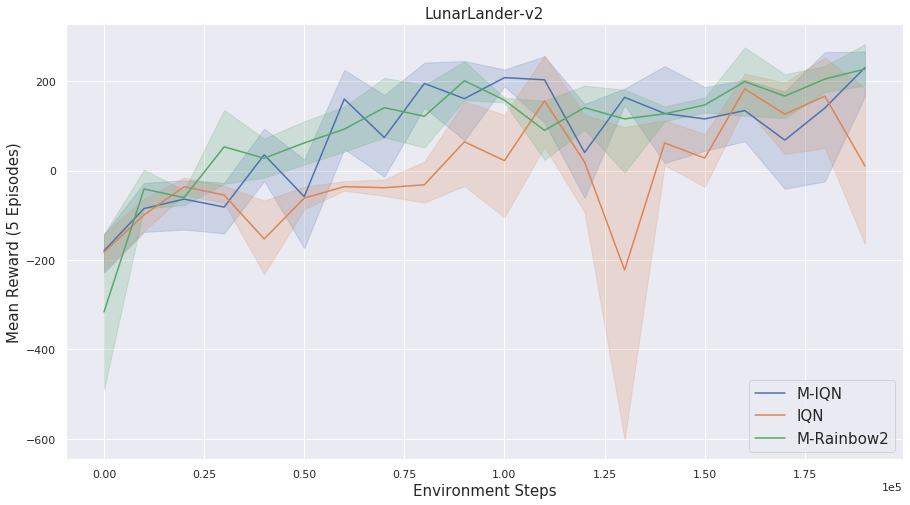

In [5]:
fig = plt.figure(figsize=(15,8))

plt.ticklabel_format(style='sci', axis='x',useOffset=False, scilimits=(0,0))
ax = sns.lineplot(x='Environment Steps', y='Mean Reward (5 Episodes)', data=data_1,label="M-IQN", ci= 90)
ax = sns.lineplot(x='Environment Steps', y='Mean Reward (5 Episodes)', data=data_2,label="IQN", ci= 90)
ax = sns.lineplot(x='Environment Steps', y='Mean Reward (5 Episodes)', data=data_3,label="M-Rainbow2", ci= 90)
# Set the title to Comic Sans


plt.title("LunarLander-v2", fontsize=15)
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)

plt.legend(loc='lower right',fontsize=15)
#plt.savefig("IQN_MIQN_LL_.png", dpi=300)
plt.show()
